In [35]:
using LinearAlgebra
using DelimitedFiles
using LsqFit
using Plots
using QuantumOptics
using Statistics

# CO Vibrational Potential on Pt(111) Surface Fit

In [36]:
# read the data from potential_data
data = readdlm("potential_data", skipstart=1)

x = data[:, 1]
E = data[:, 2]

5-element Vector{Float64}:
 -2324.43478737
 -2324.81103781
 -2324.92073811
 -2324.82997754
 -2324.58876119

### Polynomial fit

Best fit parameters: [-2323.7387648615027, -0.8761766983958771, 0.189598946260587, -0.00967453013724633]


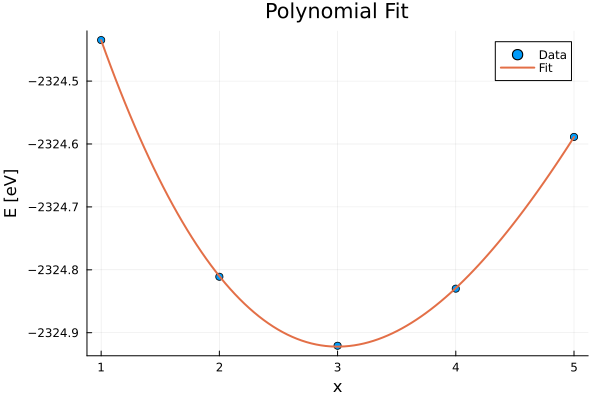

In [37]:
model(x, p) = p[1] .+ p[2] * x .+ p[3] * x.^2 .+ p[4] * x.^3
initial_params = [1000.0, - 1.0, 0.0, 0.0]
fit_result = curve_fit(model, x, E, initial_params)

best_fit_params = fit_result.param

println("Best fit parameters: ", best_fit_params)

# plot the data and the fit
x_plot = range(minimum(x), stop=maximum(x), length=100)
scatter(x, E, label="Data", xlabel="x", ylabel="E [eV]", title="Polynomial Fit")
plot!(x_plot, model(x_plot, best_fit_params), label="Fit", linewidth=2)

### Morse Potential

Best fit Morse parameters: [10.96418420047642, 0.095583781567494, 2.9992735254422755, -2324.9210104815297]


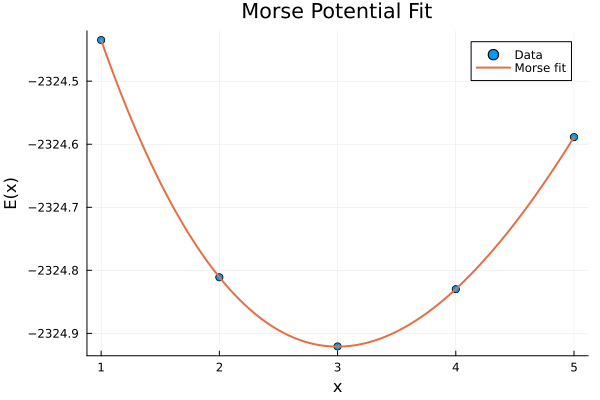

In [38]:
# Morse potential model
morse(x, p) = p[1] .* (1 .- exp.(-p[2] .* (x .- p[3]))).^2 .+ p[4]
# p = [De, a, xe, E0]

# initial guesses
p0 = [maximum(E) - minimum(E), 1.0, mean(x), minimum(E)]

fit = curve_fit(morse, x, E, p0)
params = fit.param
println("Best fit Morse parameters: ", params)

# plot data + fit
x_plot = range(minimum(x), stop=maximum(x), length=200)
scatter(x, E, label="Data", xlabel="x", ylabel="E(x)", title="Morse Potential Fit")
plot!(x_plot, morse(x_plot, params), label="Morse fit", linewidth=2)

### Solve the Schrödinger Equation

In [ ]:
# Define grid (1D position basis)
xmin, xmax, N = minimum(x), maximum(x), 400
dx = (xmax - xmin)/N
b = PositionBasis(xmin, xmax, N)


# Define potential operator from fitted Morse potential
xgrid = position(b)
V_vals = morse(xgrid, params)
V = potentialoperator(b, V_vals)

# Define kinetic energy operator
mass = 2.0  # reduced mass of CO in atomic mass units
T = kinetic(b, mass)   # you need to define the reduced mass of CO here

# Hamiltonian
H = T + V

# Diagonalize Hamiltonian
energies, states = eigenstates(dense(H))

# Show first few vibrational energies
println("First few vibrational levels: ", energies[1:5])


MethodError: MethodError: objects of type Operator{PositionBasis{1.0, 5.0, Int64, Float64}, PositionBasis{1.0, 5.0, Int64, Float64}, Matrix{ComplexF64}} are not callable
The object of type `Operator{PositionBasis{1.0, 5.0, Int64, Float64}, PositionBasis{1.0, 5.0, Int64, Float64}, Matrix{ComplexF64}}` exists, but no method is defined for this combination of argument types when trying to treat it as a callable object.